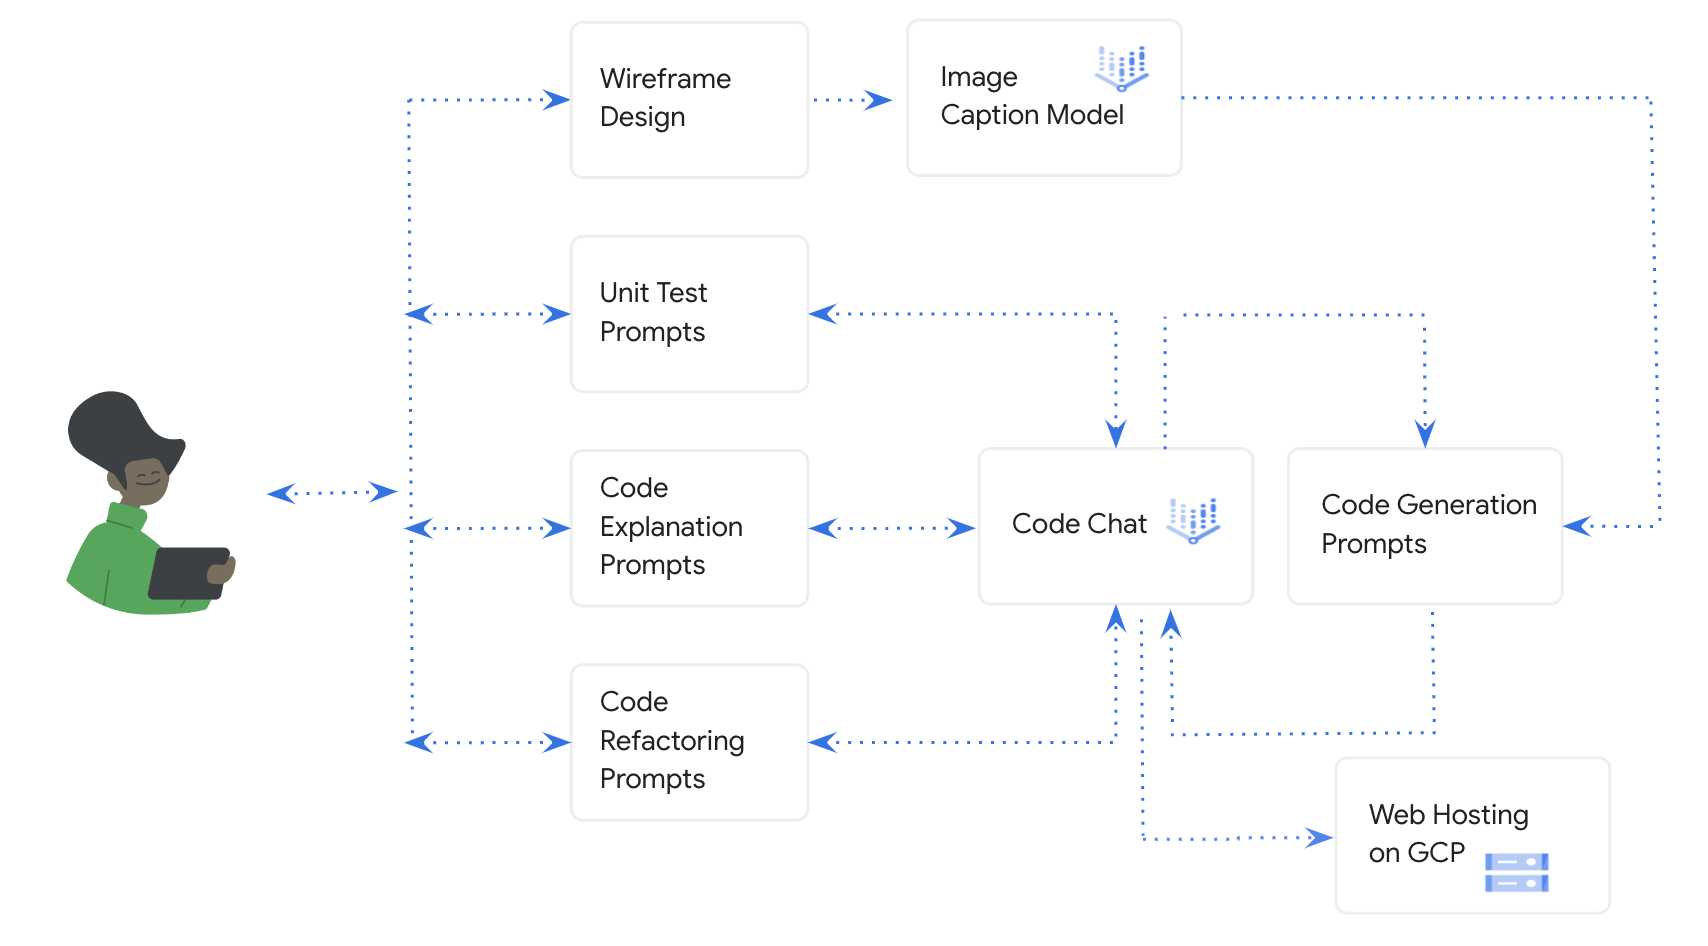

* Author: [leip@](https://moma.corp.google.com/person/leip)
* Date: 10/26/23
* Demo Link: [demo](https://drive.google.com/file/d/1Bp_I4bFjHdHC1V3w_uYSAQUMKeF1c2kq/view?usp=drive_link&resourcekey=0-fyob6PddNeZdT6jeG0k3sQ)
* Workflow Architecture: [Link](https://docs.google.com/presentation/d/1XwUHAQHtRAG6_lZqvGaW4H4gNpwEorXUdJVRabz0GLU/edit?resourcekey=0-1BAo1aT9KaNtSd1ZV6Qi6g)

## Prep Work

In [ ]:
# @title Install Libraries
import sys

if 'google.colab' in sys.modules:
    ! pip install google-cloud-aiplatform
    ! pip install google-cloud-discoveryengine
    from google.colab import auth as google_auth
    google_auth.authenticate_user()

In [ ]:
# @title Initialize Vertex AI
import vertexai
from vertexai.language_models import CodeGenerationModel

VERTEX_API_PROJECT = 'certain-haiku-391918'
VERTEX_API_LOCATION = 'us-central1'

vertexai.init(project=VERTEX_API_PROJECT, location=VERTEX_API_LOCATION)

In [ ]:
# @title Describe Login Page Design via Image Captioning model

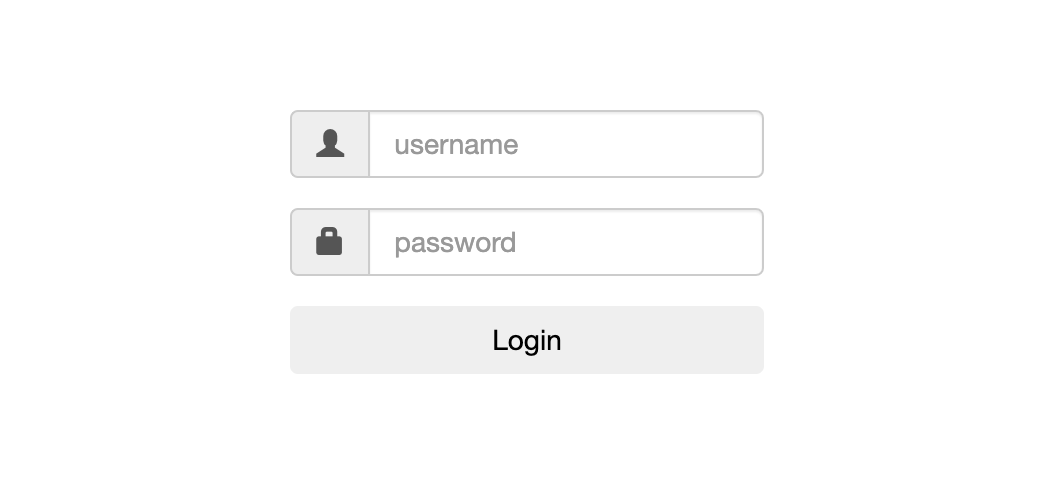

In [ ]:
from vertexai.vision_models import ImageTextModel, Image
model = ImageTextModel.from_pretrained("imagetext@001")

source_image = Image.load_from_file(location='loginpage.png')

captions = model.get_captions(
    image=source_image,
    number_of_results=1,
    language="en",
)
print(captions)

['a login page for a website with username and password fields']


In [ ]:
# @title Use the Description to Generate HTML and CSS code via Codey
from vertexai.language_models import CodeChatModel

code_chat_model = CodeChatModel.from_pretrained("codechat-bison")
chat = code_chat_model.start_chat()

In [ ]:
def send_message(message, max_token=1024):
    parameters = {
    "temperature": 0.2,
    "max_output_tokens": max_token
    }
    response = chat.send_message(message, **parameters)
    return response.text

In [ ]:
message = f"""Generate {captions} in HTML and CSS with CSS embeded in HTML
"""
index_page = send_message(message)
print(index_page)

 ```html
<!DOCTYPE html>
<html>
<head>
  <title>Login Page</title>
  <style>
    body {
      font-family: Arial, Helvetica, sans-serif;
      margin: 0;
    }

    .login-form {
      width: 300px;
      margin: 0 auto;
      padding: 20px;
    }

    .login-form h1 {
      text-align: center;
    }

    .login-form input {
      width: 100%;
      padding: 10px;
      margin-bottom: 10px;
      border: 1px solid #ccc;
    }

    .login-form button {
      width: 100%;
      padding: 10px;
      background-color: #000;
      color: #fff;
      border: none;
      cursor: pointer;
    }
  </style>
</head>
<body>
  <div class="login-form">
    <h1>Login</h1>
    <form action="/login" method="post">
      <input type="text" name="username" placeholder="Username">
      <input type="password" name="password" placeholder="Password">
      <button type="submit">Login</button>
    </form>
  </div>
</body>
</html>
```


In [ ]:
def write_file(filename, content):
    with open(filename, "w") as f:
        f.write(content)

index_page=index_page.removeprefix(' ```html').removesuffix('```')
write_file("index.html", index_page)

In [ ]:
# @title Deploy Static Website to GCP
from google.cloud import storage

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    generation_match_precondition = None

    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)

    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

In [ ]:
upload_blob("demo_test_public_bucket","index.html","index.html")

File index.html uploaded to index.html.


In [ ]:
# @title Change Website Design (Login Button Color) via Codey
message = f"""Change the login button to red
"""
index_page = send_message(message)

In [ ]:
index_page=index_page.removeprefix(' ```html').removesuffix('```')
write_file("index.html", index_page)

upload_blob("demo_test_public_bucket","index.html","index.html")

File index.html uploaded to index.html.


In [ ]:
# @title Add Javascript Code to Handle the Login Logic
message = f"""Add Javascript code to handle the click of the red login button.
If username is 'Lei' and password is '1234',
please show a popup window saying 'Success!',
otherwise please a popup window saying 'Login Failed!'
"""
index_page = send_message(message)

In [ ]:
index_page=index_page.removeprefix(' ```html').removesuffix('```')
write_file("index.html", index_page)

upload_blob("demo_test_public_bucket","index.html","index.html")

File index.html uploaded to index.html.


In [ ]:
# @title Write Unit Test for Javascript Code
message = f"""Write unit test for the Javascript code you just generated
"""
unit_test = send_message(message)
print(unit_test)

 ```javascript
import { login } from './login.js';

describe('Login function', () => {
  it('should return true if username is Lei and password is 1234', () => {
    const username = 'Lei';
    const password = '1234';

    const result = login(username, password);

    expect(result).toBe(true);
  });

  it('should return false if username is not Lei or password is not 1234', () => {
    const username = 'Not Lei';
    const password = 'Not 1234';

    const result = login(username, password);

    expect(result).toBe(false);
  });
});
```


In [ ]:
# @title Explain Generated HTML, CSS and Javascript Code
message = f"""Explain the code line by line {index_page}
"""
explanation = send_message(message)
print(explanation)

 ```html
<!DOCTYPE html>
```

This line tells the browser that this is an HTML5 document.

```
<html>
```

This line starts the HTML document.

```
<head>
```

This line starts the head section of the document. The head section contains information about the document, such as the title and the author.

```
<title>Login Page</title>
```

This line sets the title of the document.

```
<style>
```

This line starts the style section of the document. The style section contains the CSS code that styles the document.

```
body {
  font-family: Arial, Helvetica, sans-serif;
  margin: 0;
}

.login-form {
  width: 300px;
  margin: 0 auto;
  padding: 20px;
}

.login-form h1 {
  text-align: center;
}

.login-form input {
  width: 100%;
  padding: 10px;
  margin-bottom: 10px;
  border: 1px solid #ccc;
}

.login-form button {
  width: 100%;
  padding: 10px;
  background-color: red;
  color: #fff;
  border: none;
  cursor: pointer;
}
```

This CSS code styles the document. It sets the font family, t

In [ ]:
# @title Refactor the Code via Codey
message = f"""Split {index_page} into 3 files including HTML, CSS and Javascript files
"""
refactor_code = send_message(message,2048)
print(refactor_code)

 HTML file:

```html
<!DOCTYPE html>
<html>
<head>
  <title>Login Page</title>
  <link rel="stylesheet" href="style.css">
</head>
<body>
  <div class="login-form">
    <h1>Login</h1>
    <form action="/login" method="post">
      <input type="text" name="username" placeholder="Username">
      <input type="password" name="password" placeholder="Password">
      <button type="button" onclick="login()" style="background-color: red;">Login</button>
    </form>
  </div>

  <script src="script.js"></script>
</body>
</html>
```

CSS file:

```css
body {
  font-family: Arial, Helvetica, sans-serif;
  margin: 0;
}

.login-form {
  width: 300px;
  margin: 0 auto;
  padding: 20px;
}

.login-form h1 {
  text-align: center;
}

.login-form input {
  width: 100%;
  padding: 10px;
  margin-bottom: 10px;
  border: 1px solid #ccc;
}

.login-form button {
  width: 100%;
  padding: 10px;
  background-color: red;
  color: #fff;
  border: none;
  cursor: pointer;
}
```

JavaScript file:

```javascript
func